In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
df=pd.read_csv("/content/Mentalhealth_Dataset.csv")
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


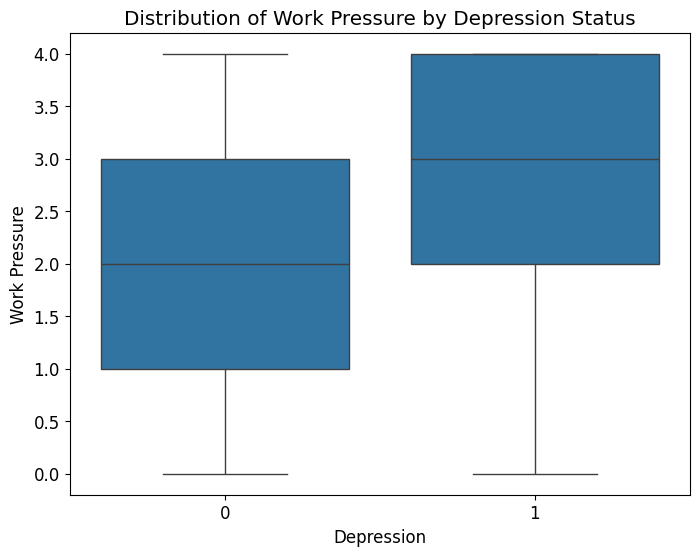

In [13]:
#Distribution of Work Pressure by Depression Status

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Distribution of Work Pressure by Depression Status')
sns.boxplot(x='Depression', y='Work Pressure', data=df)
plt.xlabel('Depression')
_ = plt.ylabel('Work Pressure')

In [3]:
df.dtypes

,0
Gender,object
Age,int64
Work Pressure,float64
Job Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Have you ever had suicidal thoughts ?,object
Work Hours,int64
Financial Stress,int64
Family History of Mental Illness,object


In [4]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [5]:
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 1 if x == '7-8 hours' else 3 if x == 'Less than 5 hours' else 2 if x == '5-6 hours' else 0)

df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,1,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,1,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,1,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,3,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,2,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,3,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,3,Moderate,Yes,4,4,No,No


In [6]:
df = df.apply(LabelEncoder().fit_transform)

df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,19,1,3,1,1,0,6,1,0,0
1,1,42,3,2,2,2,1,0,3,1,0
2,0,24,1,2,2,1,0,0,1,0,0
3,0,26,2,4,1,0,1,1,1,1,0
4,1,30,3,2,1,1,1,6,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2049,0,27,0,2,3,0,1,2,4,1,0
2050,1,7,0,4,2,0,1,12,2,1,0
2051,0,5,2,0,3,1,1,8,2,0,1
2052,0,6,0,3,3,1,1,4,3,0,0


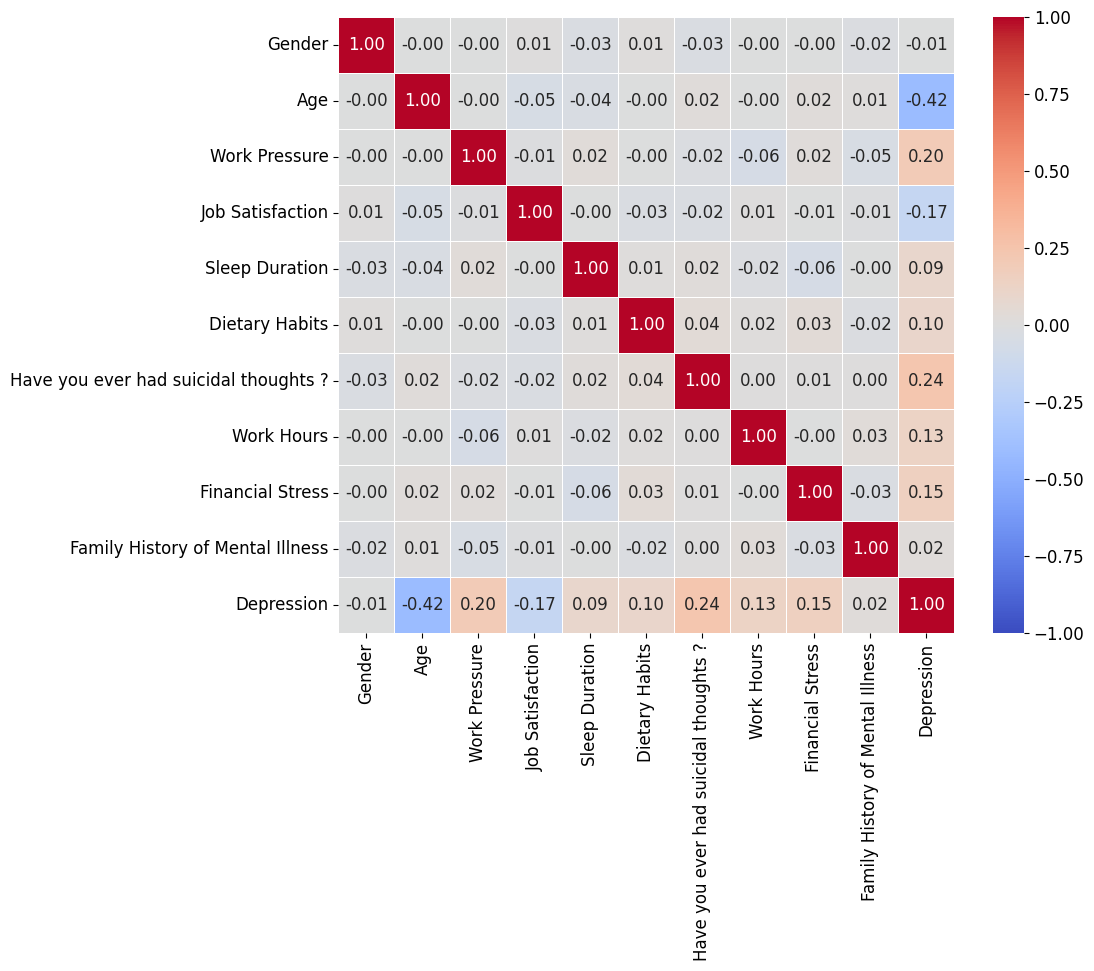

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

As we can see-

*  Depression is positively correlated with factors like work pressure, financial stress, work hours, and past suicidal stress.
*  The relationship between suicidal thoughts and depression might be interdependent, as suicidal thoughts could be a result of depression rather than a cause.
*   Notably, there is minimal or no link between family history of illness and depression, a finding that warrants further investigation using advanced machine learning models.





In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Gender                                 2054 non-null   int64
 1   Age                                    2054 non-null   int64
 2   Work Pressure                          2054 non-null   int64
 3   Job Satisfaction                       2054 non-null   int64
 4   Sleep Duration                         2054 non-null   int64
 5   Dietary Habits                         2054 non-null   int64
 6   Have you ever had suicidal thoughts ?  2054 non-null   int64
 7   Work Hours                             2054 non-null   int64
 8   Financial Stress                       2054 non-null   int64
 9   Family History of Mental Illness       2054 non-null   int64
 10  Depression                             2054 non-null   int64
dtypes: int64(11)
memory usage: 176

In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

X = df.drop(["Depression"],axis=1)
y = df["Depression"]

model = LogisticRegression(solver='liblinear', random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

model.fit(X, y)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Cross-Validation Accuracy Scores: [0.97080292 0.98053528 0.98540146 0.98053528 0.9902439 ]
Mean Accuracy: 0.9815037683223548
Standard Deviation: 0.006449279723119272
Model Coefficients: [[-0.1485404  -0.39117241  1.37021003 -1.64191922  0.57480241  0.86272509
   4.78763186  0.30459874  0.97983592  1.19443656]]
Model Intercept: [-6.79344394]


Logistic Regression
Accuracy- 98.15%

In [11]:
feature_columns=["Gender","Age","Work Pressure","Job Satisfaction","Sleep Duration","Dietary Habits","Have you ever had suicidal thoughts ?",
"Work Hours","Financial Stress","Family History of Mental Illness","Depression"]

equation = f"P(y=1) = 1 / (1 + exp(-({intercept:.4f} + "
equation += " + ".join([f"{coef:.4f} * {feature}" for coef, feature in zip(coefficients, feature_columns)])
equation += ")))"

# Print the predictive equation
print("Predictive Equation:")
print(equation)

Predictive Equation:
P(y=1) = 1 / (1 + exp(-(-6.7934 + -0.1485 * Gender + -0.3912 * Age + 1.3702 * Work Pressure + -1.6419 * Job Satisfaction + 0.5748 * Sleep Duration + 0.8627 * Dietary Habits + 4.7876 * Have you ever had suicidal thoughts ? + 0.3046 * Work Hours + 0.9798 * Financial Stress + 1.1944 * Family History of Mental Illness)))


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import export_text

X = df.drop(["Depression"], axis=1)
y = df["Depression"]

tree_model = DecisionTreeClassifier(random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(tree_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

tree_model.fit(X, y)

# Export the decision tree rules as visual representation:
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)

Cross-Validation Accuracy Scores: [0.92457421 0.91727494 0.91970803 0.93673966 0.91707317]
Mean Accuracy: 0.9230740015429351
Standard Deviation: 0.007348056771122141

Decision Tree Rules:

|--- Age <= 13.50
|   |--- Have you ever had suicidal thoughts ? <= 0.50
|   |   |--- Work Pressure <= 3.50
|   |   |   |--- Age <= 0.50
|   |   |   |   |--- Job Satisfaction <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Job Satisfaction >  2.50
|   |   |   |   |   |--- Dietary Habits <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Dietary Habits >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  0.50
|   |   |   |   |--- Job Satisfaction <= 1.50
|   |   |   |   |   |--- Work Pressure <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Work Pressure >  1.50
|   |   |   |   |   |   |--- Sleep Duration <= 1.50
|   |   |   |   |   |   |   |--- Work Hours <= 10.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   | 

Decision Tree Accuracy- 92.30%


**Conclusion**

1. ***Key Factors of Depression:***

EDA revealed that depression is mainly influenced by work pressure, financial stress, long work hours, and past suicidal thoughts (which may be interdependent).

2. ***Logistic Regression Findings:***

Depression's key contributors and their coefficients are:

*   1.37 - Work Pressure
*   0.57 - Sleep Duration
*   0.86 - Dietary Habits
*   4.78 - Suicidal Thoughts
*   0.30 - Work Hours
*   0.98 - Financial Stress
*   1.19 - Family Mental Health History

3. ***Model Comparison:***

Both logistic regression and decision tree models performed well, but logistic regression is preferred for its higher accuracy and clear prediction equation.





